#Google Drive Mount and Access to Datathon Directory


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Datathon/datasets

/content/drive/MyDrive/Datathon/datasets


#Library Calls

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from tabulate import tabulate
from IPython.display import display
from google.colab import files
import re
import csv
import openpyxl

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.api as sm

# Set a default style for seaborn
sns.set_style("whitegrid")


#Data Visualisation

##Correlation Heatmap of Variables Related to Research and Development

<ipython-input-5-7ed9463595f1>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


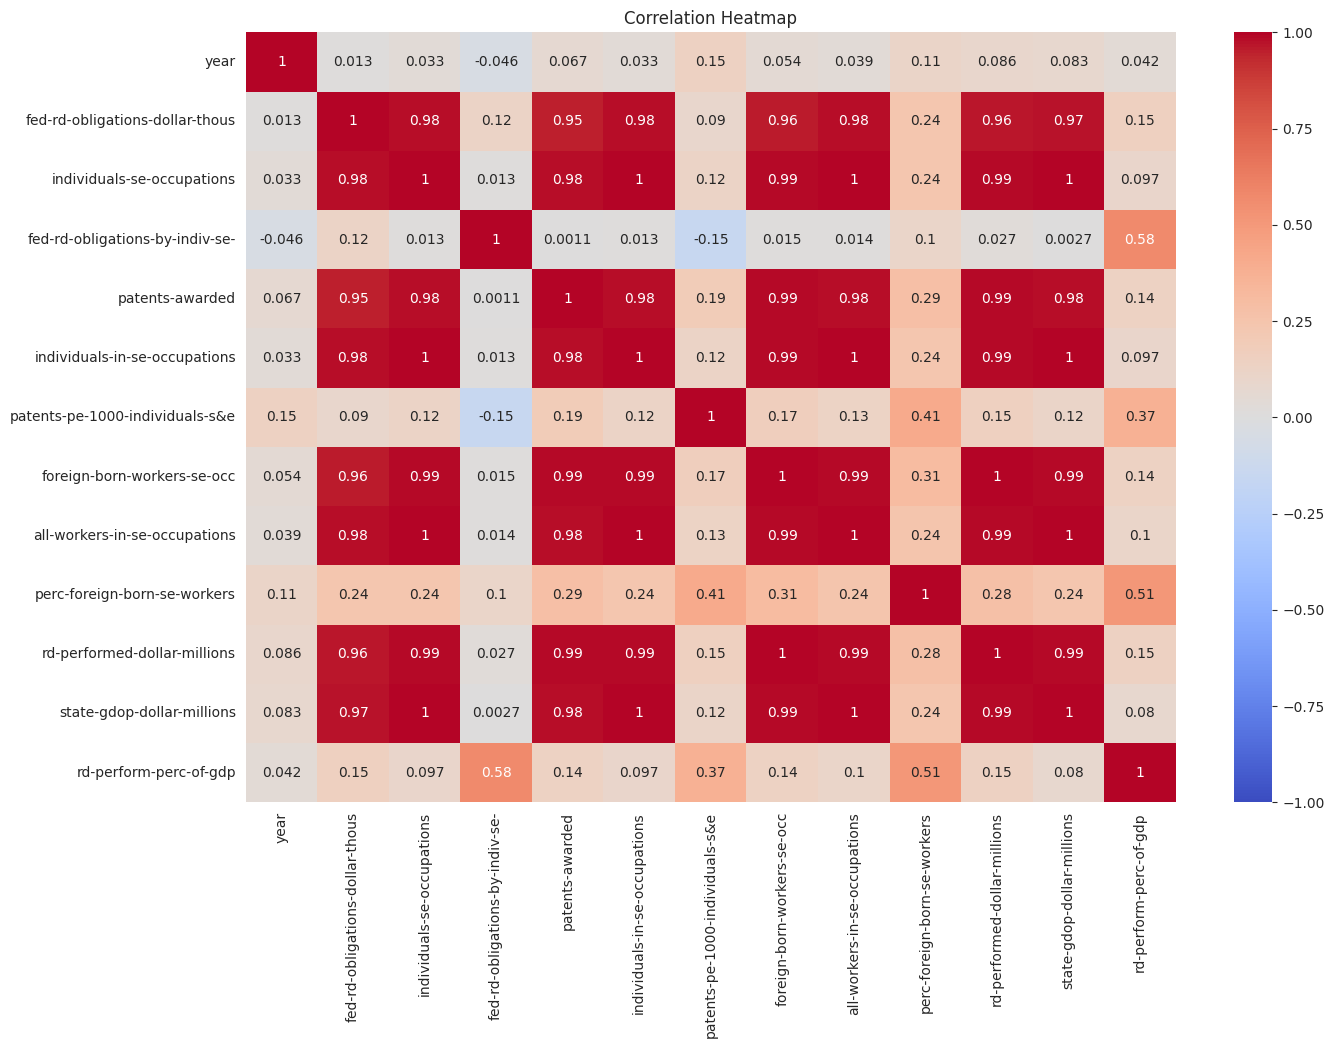

In [5]:
# Load your dataset
df = pd.read_csv('Master-federal-funds.csv')

# Compute the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Heatmap of Variables Related to R&D')
plt.show()


##Correlation Heatmap of all Variables


<ipython-input-5-12ab9e58dcb9>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Master-final.csv')
<ipython-input-5-12ab9e58dcb9>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


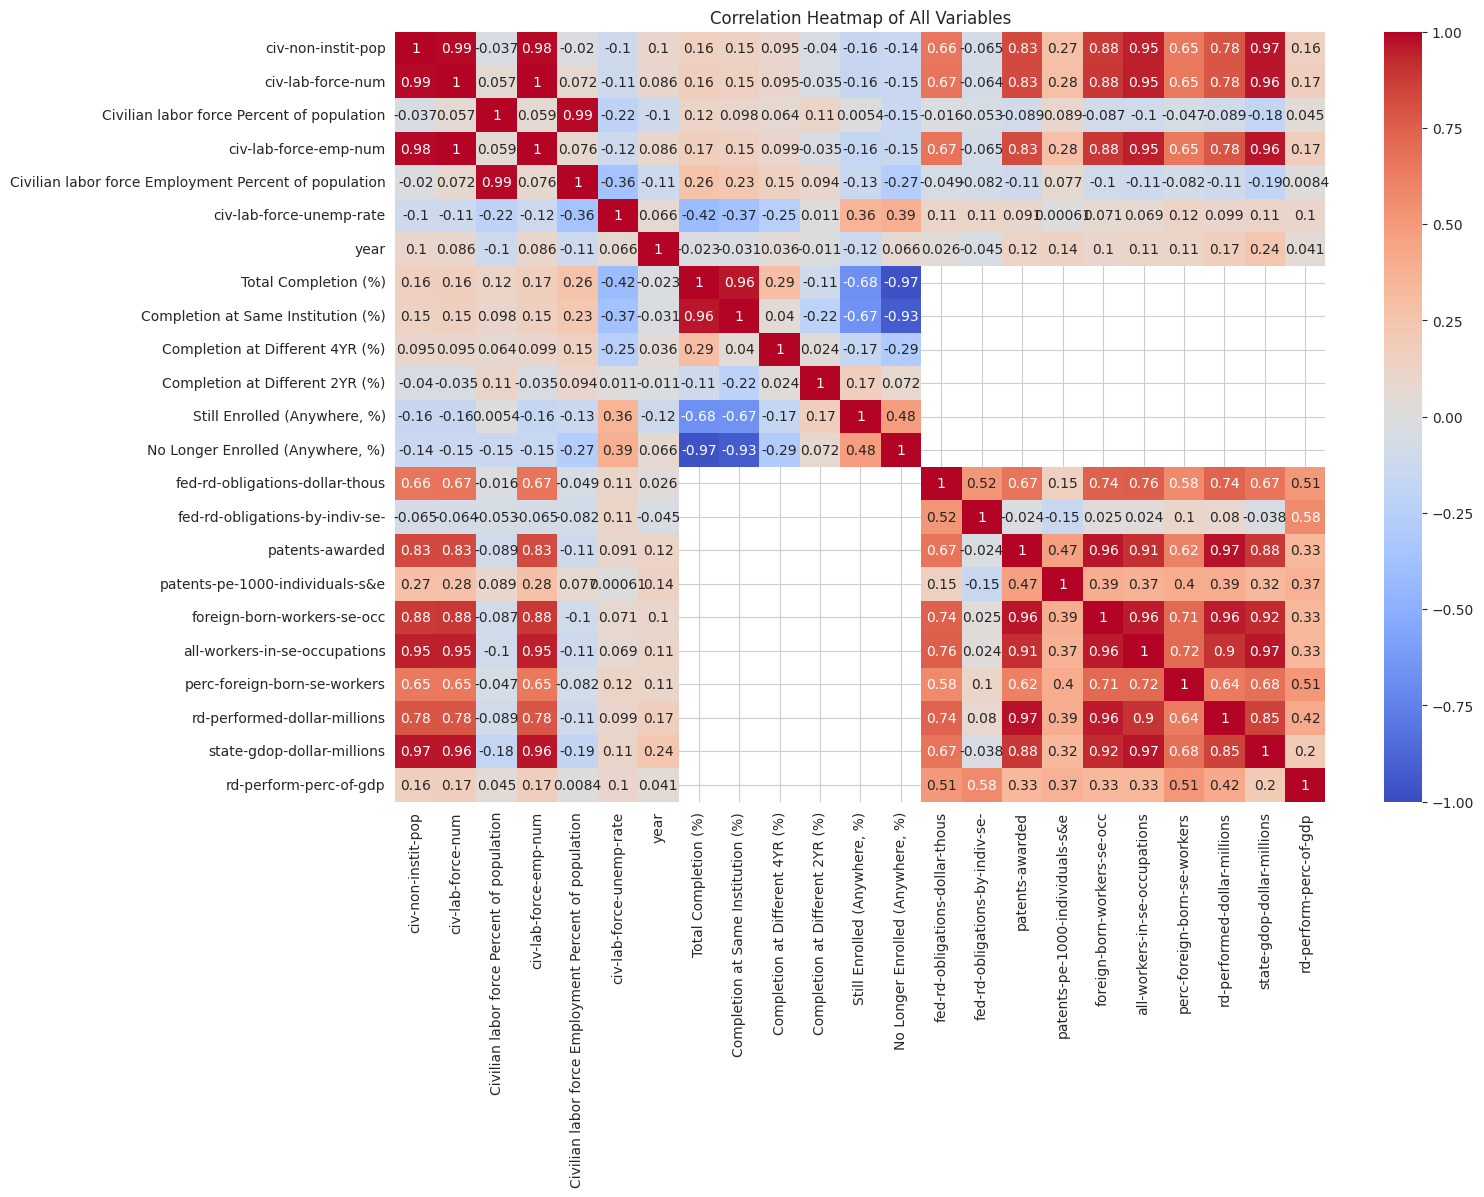

In [5]:
# Load your dataset
df = pd.read_csv('Master-final.csv')
df = df[df['State'] != 'United States']

# Compute the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Heatmap of All Variables')
plt.show()

<ipython-input-6-c326033b53b0>:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Master-final.csv')


,State,civ-non-instit-pop,civ-lab-force-num,Civilian labor force Percent of population,civ-lab-force-emp-num,Civilian labor force Employment Percent of population,civ-lab-force-unemp-num,civ-lab-force-unemp-rate,year,Gender,...,fed-rd-obligations-by-indiv-se-,patents-awarded,patents-pe-1000-individuals-s&e,foreign-born-workers-se-occ,all-workers-in-se-occupations,perc-foreign-born-se-workers,rd-performed-dollar-millions,state-gdop-dollar-millions,rd-perform-perc-of-gdp,Race_y
0,Alabama,2482.0,1585.0,63.8,1532.0,61.7,53,3.3,2000.0,Total,...,NaN,NaN,NaN,NaN,NaN,NaN,1730.0,119852.0,1.443447,Total
1,Alabama,1179.0,859.0,72.8,834.0,70.7,25,2.9,2000.0,Men,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,1303.0,726.0,55.7,698.0,53.6,28,3.8,2000.0,Women,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,183.0,93.0,51.0,79.0,43.4,14,15.0,2000.0,Total,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,190.0,145.0,76.4,137.0,72.4,8,5.2,2000.0,Total,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9208,Wisconsin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,Total,...,NaN,NaN,NaN,NaN,NaN,NaN,2566.0,172224.0,1.489920,Total
9209,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,Total,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,15680.0,0.420918,Total
9210,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.0,Total,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58654.0,NaN,Total
9211,Puerto Rico,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,Total,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62569.0,NaN,Total


<ipython-input-6-c326033b53b0>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = white_df.corr()


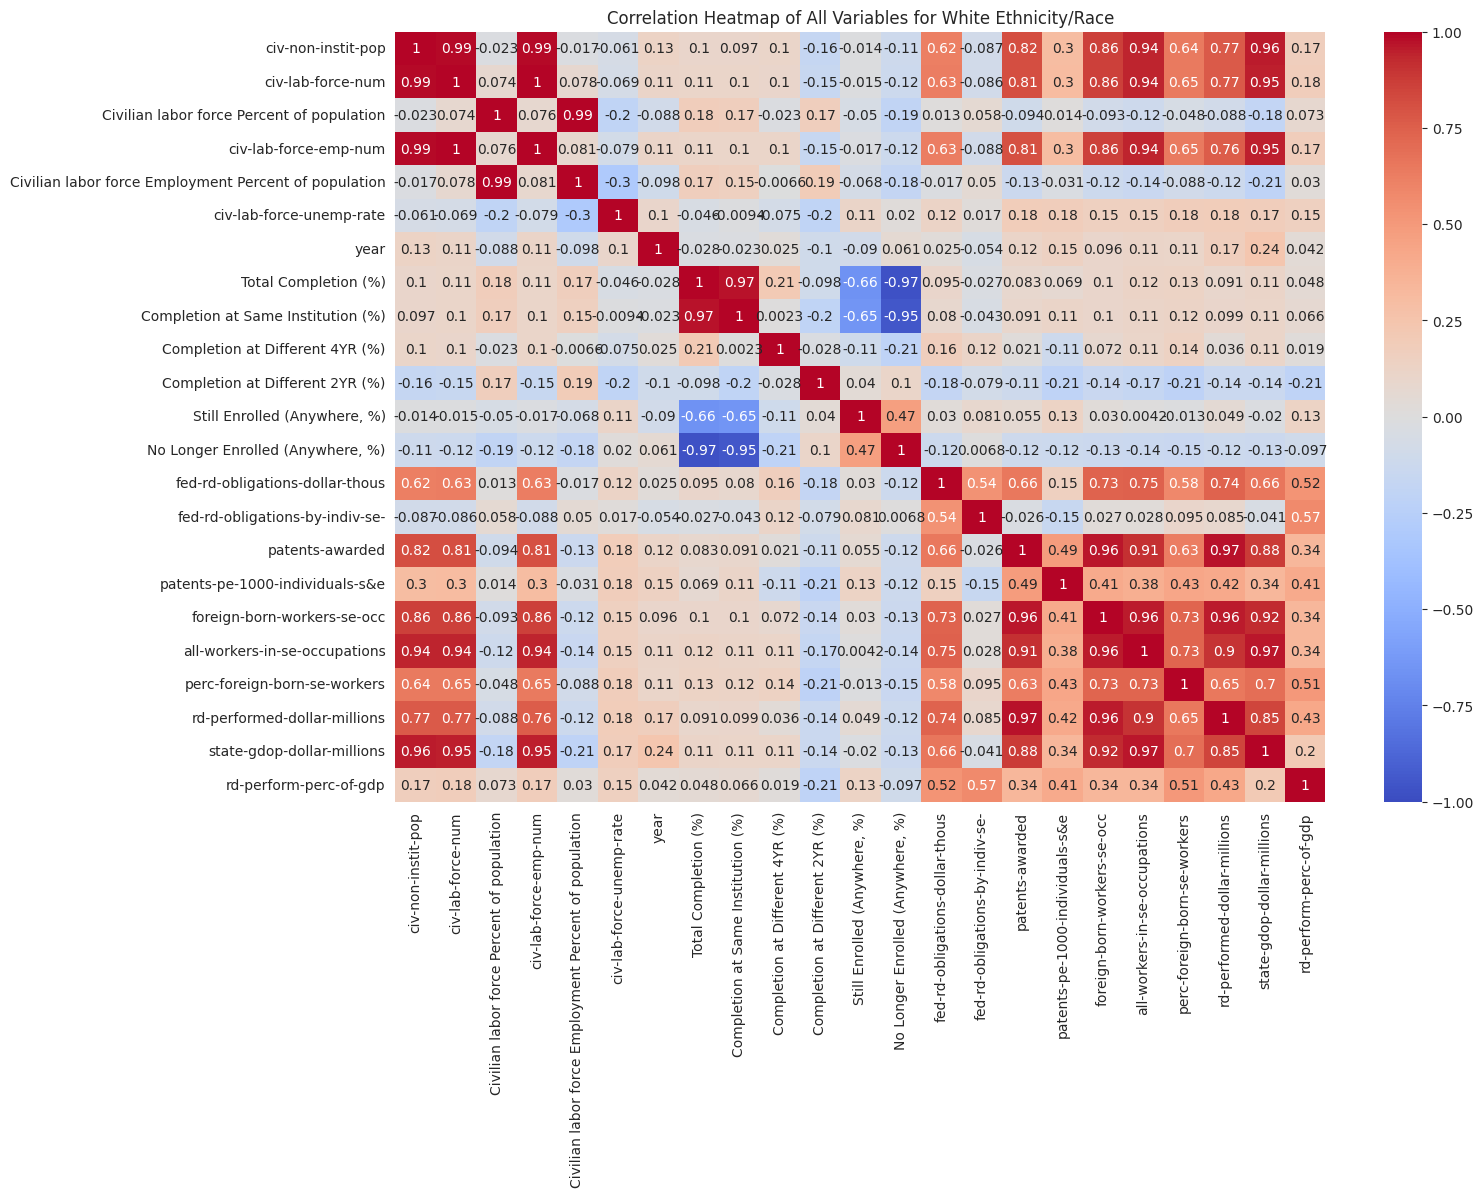

In [6]:
# Load your dataset
df = pd.read_csv('Master-final.csv')

# Filter rows where race is white
white_df = df[df['Race'] == 'White']
white_df = white_df[white_df['State'] != 'United States']

# Remove rows where all values are NaN
white_df = white_df.dropna(how='all')

# Remove columns where all values are NaN
white_df = white_df.dropna(axis=1, how='all')

#call the federal research set
fed = pd.read_csv('Master-federal-funds-total.csv')
fed = fed[fed['State'] != 'United States']
fed = fed.drop(columns=['individuals-in-se-occupations', 'individuals-se-occupations'])

#merge the sets
white_df = pd.merge(white_df, fed, on=['State', 'year', 'Gender', 'Age'], how='outer')

display(white_df)

# Compute the correlation matrix
corr = white_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Heatmap of All Variables for White Ethnicity/Race')
plt.show()

In [7]:
def plot_correlation_by_race(race):
    """
    Plots a correlation heatmap for a specific race.

    Parameters:
    - race (str): The race/ethnicity for which the heatmap should be plotted.
    """

    # Load your dataset
    df = pd.read_csv('Master-final.csv')

    # Filter rows based on the given race & Exclude 'United States' State
    race_df = df[df['Race'] == race]
    race_df = race_df[race_df['State'] != 'United States']

    # Remove rows where all values are NaN
    race_df = race_df.dropna(how='all')

    # Remove columns where all values are NaN
    race_df = race_df.dropna(axis=1, how='all')

    # Call the federal research set
    fed = pd.read_csv('Master-federal-funds-total.csv')
    fed = fed[fed['State'] != 'United States']
    fed = fed.drop(columns=['individuals-in-se-occupations', 'individuals-se-occupations'])

    # Merge the datasets
    race_df = pd.merge(race_df, fed, on=['State', 'year', 'Gender', 'Age'], how='outer')

    # Compute the correlation matrix
    corr = race_df.corr()

    # Plot the heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

    # Add title
    plt.title(f'Correlation Heatmap of All Variables for {race} Ethnicity/Race')
    plt.show()

# Execute the function
plot_correlation_by_race('White')
plot_correlation_by_race('Black')
plot_correlation_by_race('Hispanic')
plot_correlation_by_race('Asian')



Output hidden; open in https://colab.research.google.com to view.

##Regression Analysis

###Analysis of employment number for all categories

<ipython-input-14-01115459b3de>:14: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Master-final.csv')


Mean Squared Error (MSE): 91599.01664247658
Root Mean Squared Error (RMSE): 302.6532944517151
Mean Absolute Error (MAE): 158.07613414963706
R-squared: 0.9623438680427739


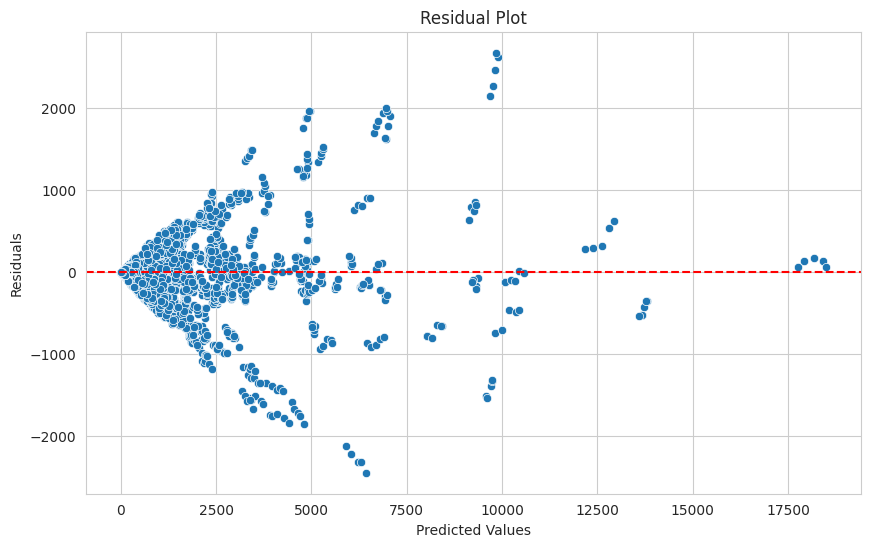

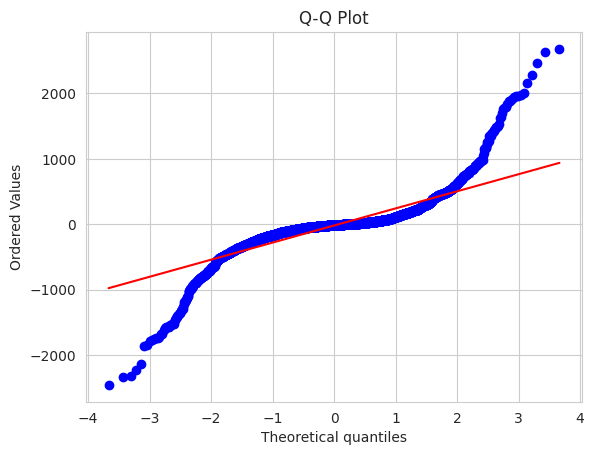

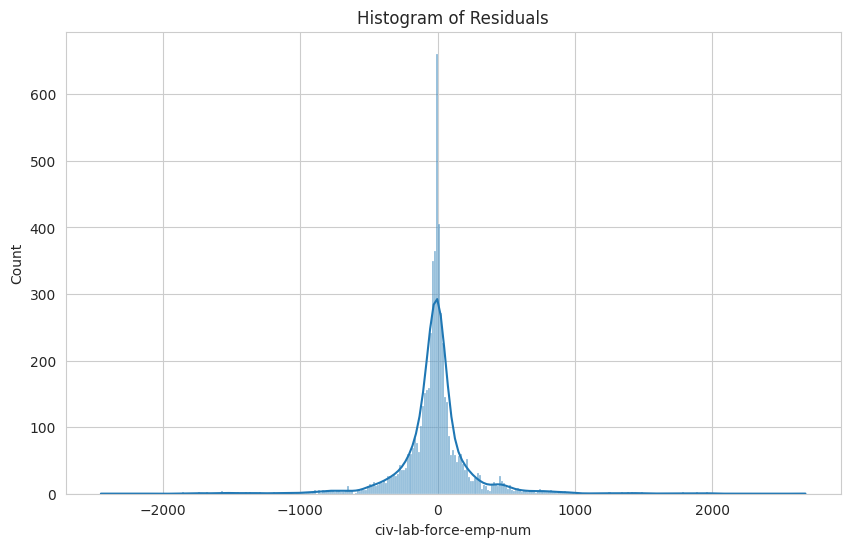

                         Feature         VIF
0             civ-non-instit-pop    1.447322
1                patents-awarded  155.124053
2    foreign-born-workers-se-occ  222.225759
3  all-workers-in-se-occupations  292.315715
4   rd-performed-dollar-millions  163.034424
5     state-gdop-dollar-millions  229.038679
                              OLS Regression Results                             
Dep. Variable:     civ-lab-force-emp-num   R-squared:                       0.972
Model:                               OLS   Adj. R-squared:                  0.972
Method:                    Least Squares   F-statistic:                 1.971e+05
Date:                   Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                           14:11:11   Log-Likelihood:            -2.2120e+05
No. Observations:                  34011   AIC:                         4.424e+05
Df Residuals:                      34004   BIC:                         4.425e+05
Df Model:                    

In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import learning_curve
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Load the dataset
data = pd.read_csv('Master-final.csv')

# Compute correlation matrix with respect to the target variable 'civ-labor-force-emp-num'
correlation_matrix = data.corr(numeric_only=True)
target_corr = correlation_matrix['civ-lab-force-emp-num']

# Filter features with correlation > 0.7 (high correlation) and < 0.99 with the target variable
selected_features = target_corr[(target_corr > 0.7) & (target_corr < 0.99)].index.tolist()

X = data[selected_features]
Y = data['civ-lab-force-emp-num']


# Split data by year for training and testing
X_train = X[data['year'] < 2014]
Y_train = Y[data['year'] < 2014]
X_test = X[data['year'] >= 2015]
Y_test = Y[data['year'] >= 2015]

# Handle NaN values in the training set
nan_indices = Y_train[Y_train.isna()].index
X_train = X_train.drop(nan_indices)
Y_train = Y_train.drop(nan_indices)

# Handle NaN values in the test set
nan_indices_test = Y_test[Y_test.isna()].index
X_test = X_test.drop(nan_indices_test)
Y_test = Y_test.drop(nan_indices_test)

# Handle NaN values in features by imputing them with the mean of the column
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions
predictions = model.predict(X_test)

# Metrics
mse = mean_squared_error(Y_test, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, predictions)
r2 = r2_score(Y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

# Residuals
residuals = Y_test - predictions

# Residual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=predictions, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

# Q-Q Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()

# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# VIF
vif_data = pd.DataFrame()
# Using the columns from the original X subset before scaling
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
print(vif_data)


# Model summary using statsmodels
X_train_const = sm.add_constant(X_train)  # Adds a constant column for intercept
model_sm = sm.OLS(Y_train, X_train_const)
results = model_sm.fit()
print(results.summary())





###Analysis of Employment number by Race

####Analysis of White Employment Number

In [21]:
def create_df_by_race(race):
    """
    Creates a correlation dataframe for a specific race.

    Parameters:
    - race (str): The race/ethnicity for which the dataframe should be created.

    Returns:
    - DataFrame: A dataframe of correlations for the given race.
    """

    # Load your dataset
    df = pd.read_csv('Master-final.csv')

    # Filter rows based on the given race & Exclude 'United States' State
    race_df = df[df['Race'] == race]
    race_df = race_df[race_df['State'] != 'United States']

    # Remove rows where all values are NaN
    race_df = race_df.dropna(how='all')

    # Remove columns where all values are NaN
    race_df = race_df.dropna(axis=1, how='all')

    # Call the federal research set
    fed = pd.read_csv('Master-federal-funds-total.csv')
    fed = fed[fed['State'] != 'United States']
    fed = fed.drop(columns=['individuals-in-se-occupations', 'individuals-se-occupations'])

    # Merge the datasets
    race_df = pd.merge(race_df, fed, on=['State', 'year', 'Gender', 'Age'], how='outer')

    return race_df


def evaluate_model_by_race(race):
    # Assuming necessary imports and the `create_df_by_race` function definition are already present

    # Load the dataset
    data = create_df_by_race(race)

    # Compute correlation matrix with respect to the target variable 'civ-labor-force-emp-num'
    correlation_matrix = data.corr(numeric_only=True)
    target_corr = correlation_matrix['civ-lab-force-emp-num']

    # Filter features with correlation > 0.7 and < 0.99 with the target variable
    selected_features = target_corr[(target_corr > 0.7) & (target_corr < 0.99)].index.tolist()


    # Drop rows with NaN values in the specified columns
    data = data.dropna(subset=['civ-lab-force-emp-num'])

    X = data[selected_features]
    Y = data['civ-lab-force-emp-num']

    # Determine the cut-off year for splitting the data
    cut_off_year = data['year'].max() - 1

    # Split data by year for training and testing
    X_train = X[data['year'] <= cut_off_year]
    Y_train = Y[data['year'] <= cut_off_year]
    X_test = X[data['year'] > cut_off_year]
    Y_test = Y[data['year'] > cut_off_year]

    # Handle NaN values in the training set
    nan_indices = Y_train[Y_train.isna()].index
    X_train = X_train.drop(nan_indices)
    Y_train = Y_train.drop(nan_indices)

    # Handle NaN values in the test set
    nan_indices_test = Y_test[Y_test.isna()].index
    X_test = X_test.drop(nan_indices_test)
    Y_test = Y_test.drop(nan_indices_test)

    # Handle NaN values in features by imputing them with the mean of the column
    imputer = SimpleImputer(strategy="mean")
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # Train a linear regression model
    model = LinearRegression()
    model.fit(X_train, Y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Metrics
    mse = mean_squared_error(Y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(Y_test, predictions)
    r2 = r2_score(Y_test, predictions)

    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"R-squared: {r2}")

    # Residuals
    residuals = Y_test - predictions

    # Residual plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=predictions, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

    # Q-Q Plot
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    plt.show()

    # Histogram of residuals
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title('Histogram of Residuals')
    plt.show()

    # VIF
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
    print(vif_data)

    # Model summary using statsmodels
    X_train_const = sm.add_constant(X_train)  # Adds a constant column for intercept
    model_sm = sm.OLS(Y_train, X_train_const)
    results = model_sm.fit()
    print(results.summary())

     # Learning Curve
    X_total = pd.concat([pd.DataFrame(X_train, columns=selected_features), pd.DataFrame(X_test, columns=selected_features)])
    Y_total = pd.concat([Y_train, Y_test])
    train_sizes, train_scores, test_scores = learning_curve(LinearRegression(),
                                                            X_total,
                                                            Y_total,
                                                            cv=5)

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    plt.title('Learning Curve')
    plt.xlabel('Training Size')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.show()





<ipython-input-21-13abea6ffab8>:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Master-final.csv')


Mean Squared Error (MSE): 139573.6089071106
Root Mean Squared Error (RMSE): 373.59551510572317
Mean Absolute Error (MAE): 211.2063860731222
R-squared: 0.955316192852985


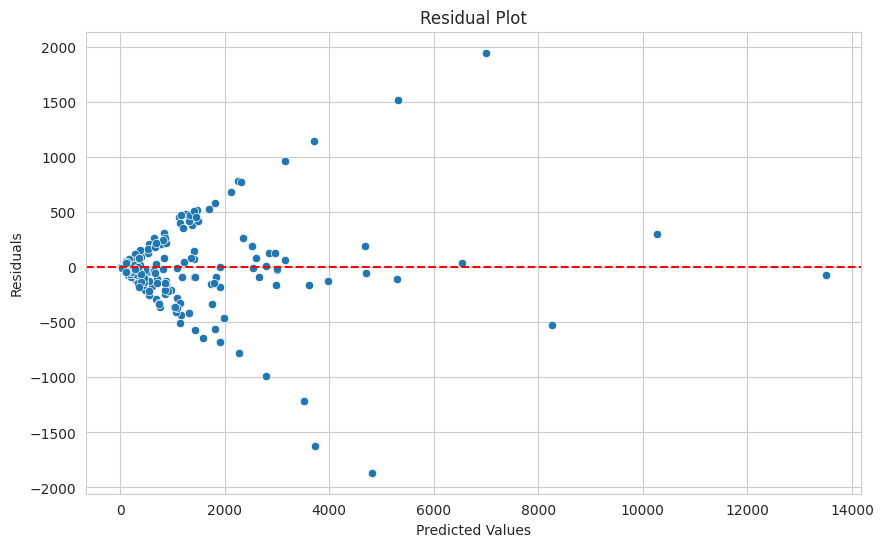

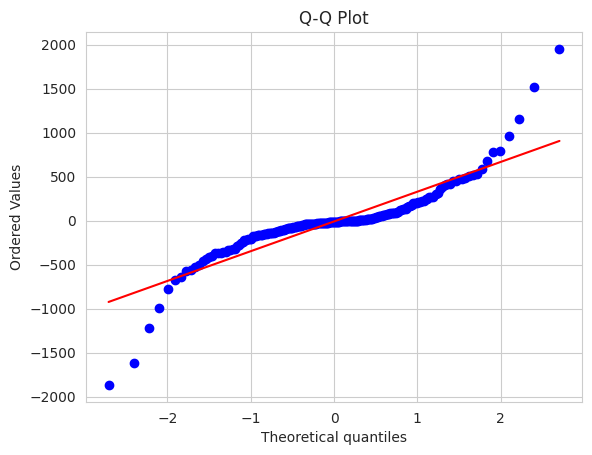

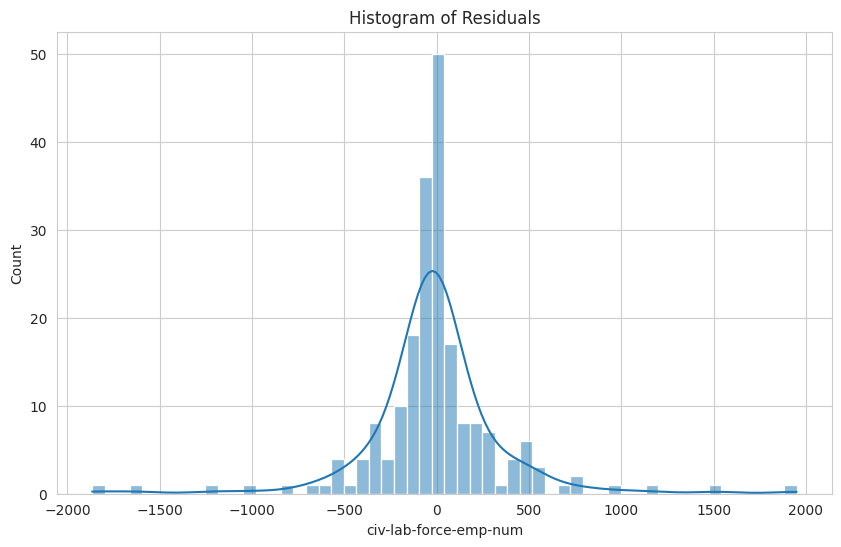

                         Feature        VIF
0             civ-non-instit-pop   2.145749
1                patents-awarded  50.100973
2    foreign-born-workers-se-occ  59.573514
3  all-workers-in-se-occupations  66.359550
4   rd-performed-dollar-millions  41.528525
5     state-gdop-dollar-millions  49.756189
                              OLS Regression Results                             
Dep. Variable:     civ-lab-force-emp-num   R-squared:                       0.974
Model:                               OLS   Adj. R-squared:                  0.974
Method:                    Least Squares   F-statistic:                 5.392e+04
Date:                   Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                           14:22:37   Log-Likelihood:                -58687.
No. Observations:                   8627   AIC:                         1.174e+05
Df Residuals:                       8620   BIC:                         1.174e+05
Df Model:                           

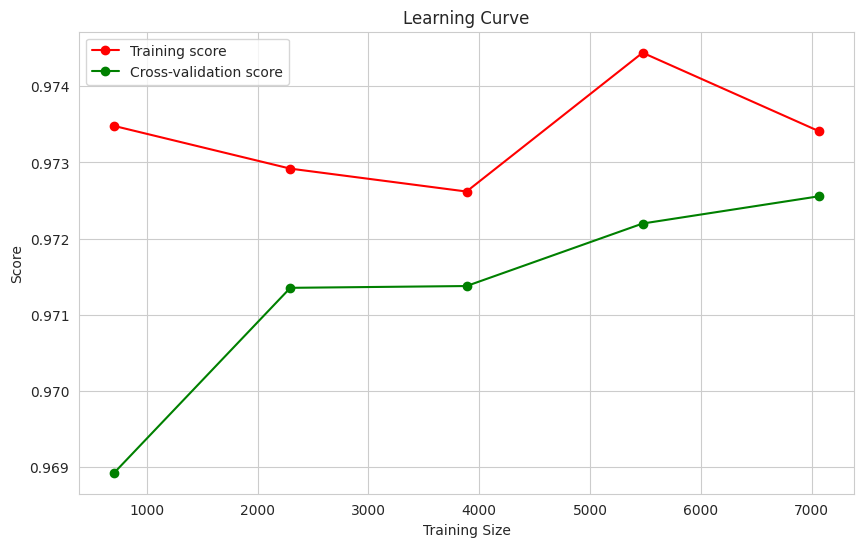

In [22]:
evaluate_model_by_race('White')

####Analysis of Black Employment Number

<ipython-input-21-13abea6ffab8>:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Master-final.csv')


Mean Squared Error (MSE): 9782.994244161064
Root Mean Squared Error (RMSE): 98.90902003437839
Mean Absolute Error (MAE): 70.4036756009941
R-squared: 0.9342841221649838


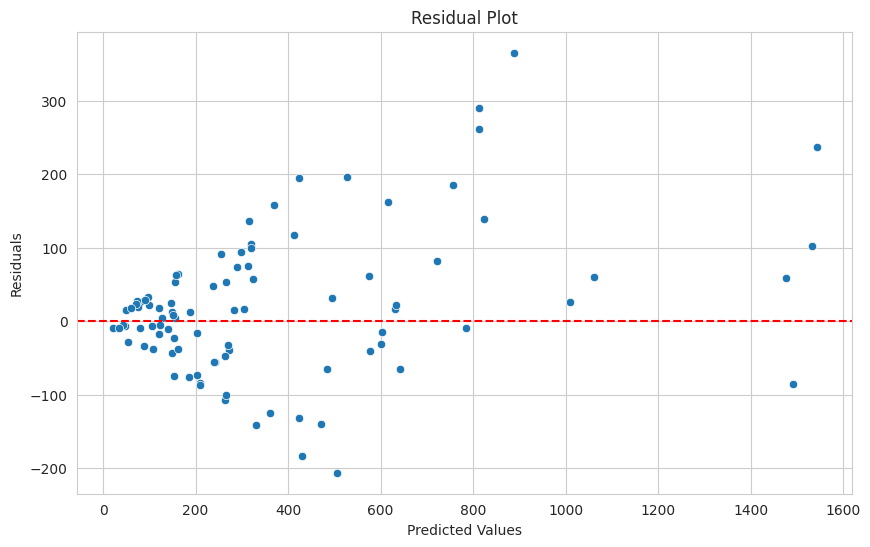

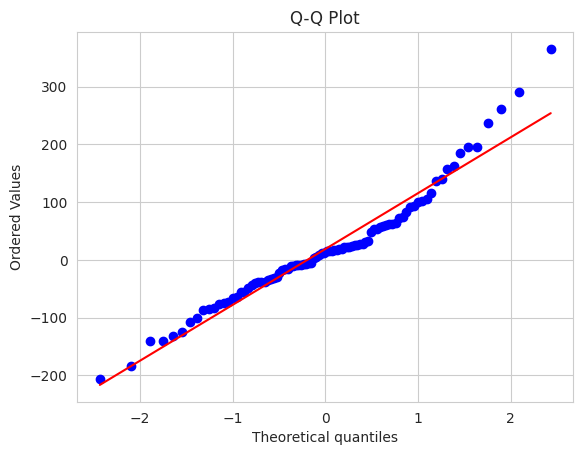

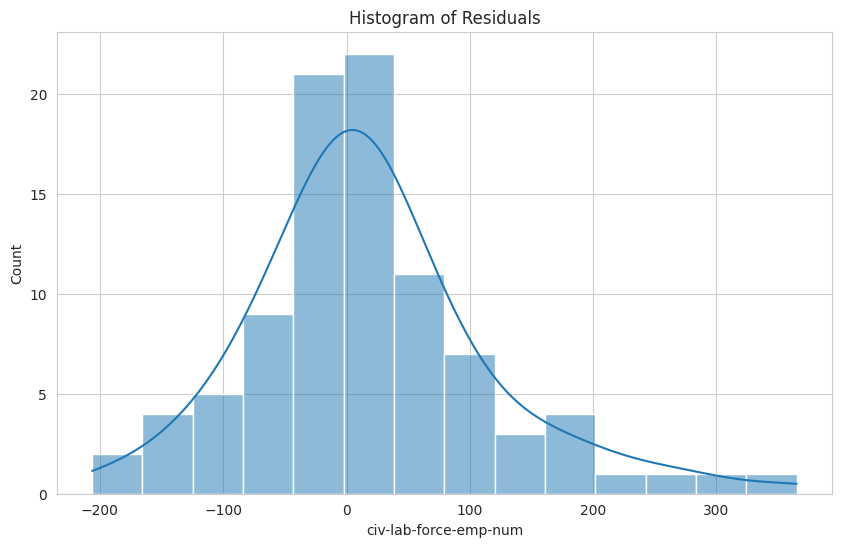

                      Feature       VIF
0          civ-non-instit-pop  2.229546
1  state-gdop-dollar-millions  2.229546
                              OLS Regression Results                             
Dep. Variable:     civ-lab-force-emp-num   R-squared:                       0.973
Model:                               OLS   Adj. R-squared:                  0.973
Method:                    Least Squares   F-statistic:                 7.989e+04
Date:                   Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                           14:22:52   Log-Likelihood:                -23020.
No. Observations:                   4456   AIC:                         4.605e+04
Df Residuals:                       4453   BIC:                         4.606e+04
Df Model:                              2                                         
Covariance Type:               nonrobust                                         
                 coef    std err          t      P>|t|      

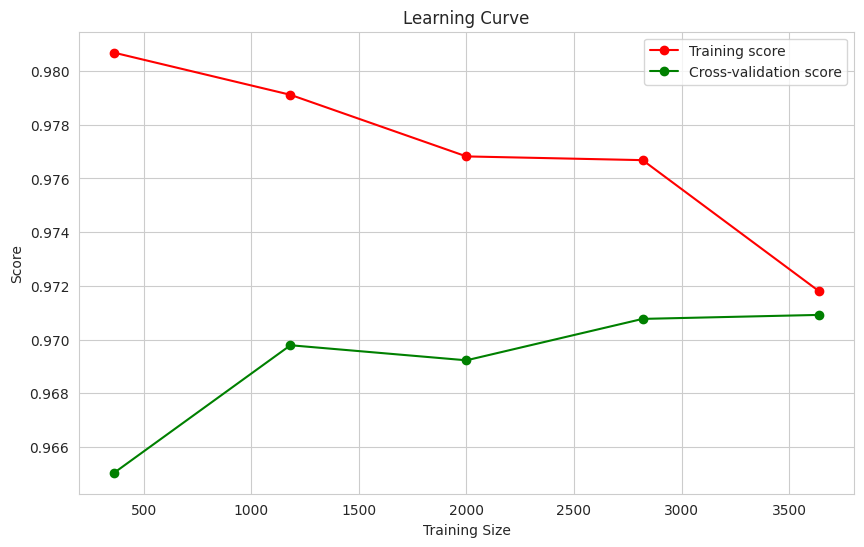

In [23]:
evaluate_model_by_race('Black')


####Analysis of Hispanic Employment Number

<ipython-input-21-13abea6ffab8>:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Master-final.csv')


Mean Squared Error (MSE): 497030.37785645365
Root Mean Squared Error (RMSE): 705.0038140722742
Mean Absolute Error (MAE): 367.7739572318896
R-squared: 0.5591364222634971


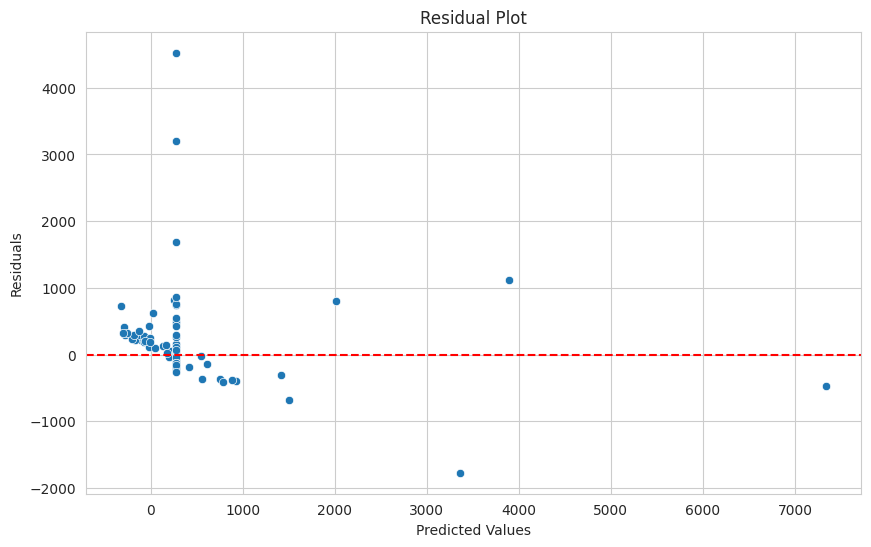

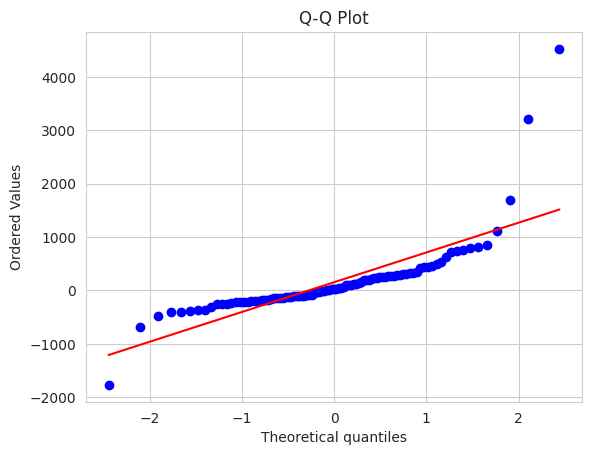

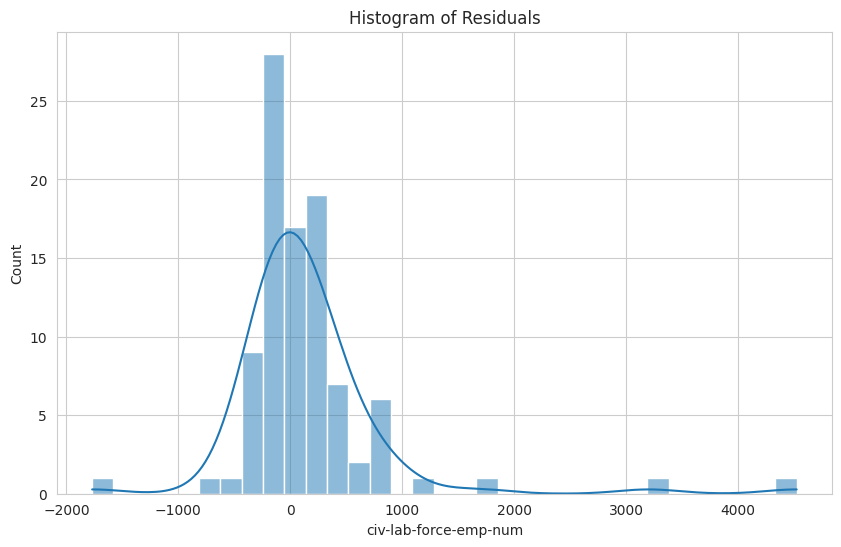

                         Feature        VIF
0                patents-awarded  37.116704
1    foreign-born-workers-se-occ  42.633794
2  all-workers-in-se-occupations  42.996188
3   rd-performed-dollar-millions  30.739636
4     state-gdop-dollar-millions  29.691226
                              OLS Regression Results                             
Dep. Variable:     civ-lab-force-emp-num   R-squared:                       0.538
Model:                               OLS   Adj. R-squared:                  0.538
Method:                    Least Squares   F-statistic:                     969.4
Date:                   Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                           14:23:06   Log-Likelihood:                -31446.
No. Observations:                   4164   AIC:                         6.290e+04
Df Residuals:                       4158   BIC:                         6.294e+04
Df Model:                              5                                        

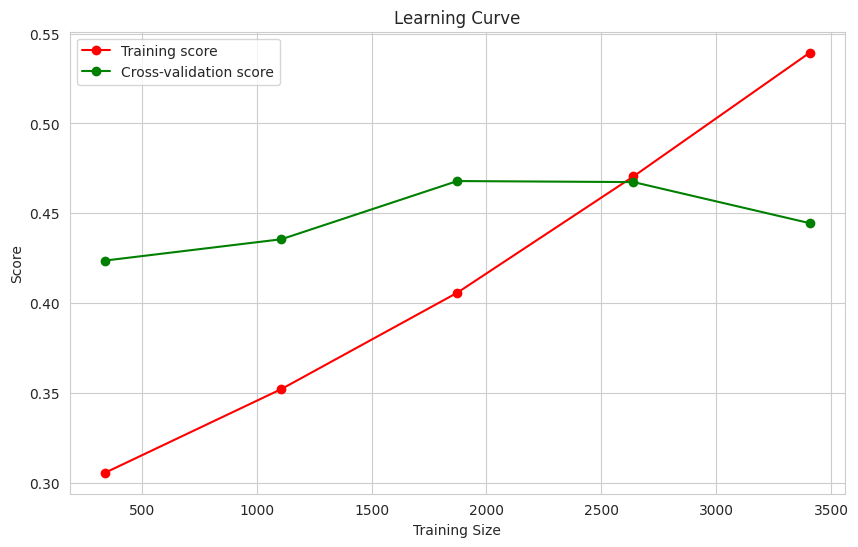

In [24]:
evaluate_model_by_race('Hispanic')

####Analysis of Asian Employment Number

<ipython-input-21-13abea6ffab8>:13: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Master-final.csv')


Mean Squared Error (MSE): 115245.6747896718
Root Mean Squared Error (RMSE): 339.4785336213054
Mean Absolute Error (MAE): 159.71706000047257
R-squared: 0.5774949071322326


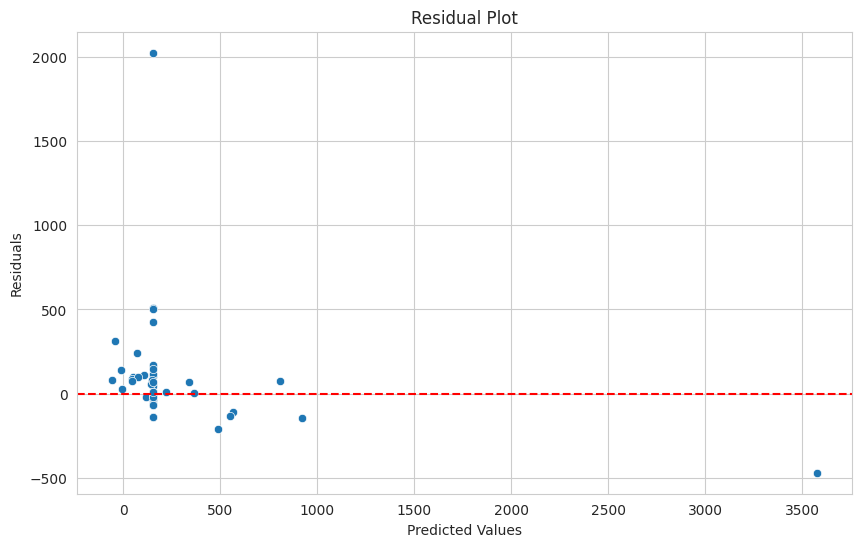

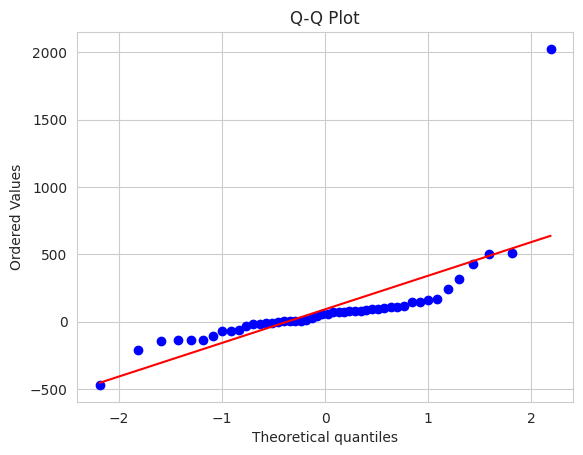

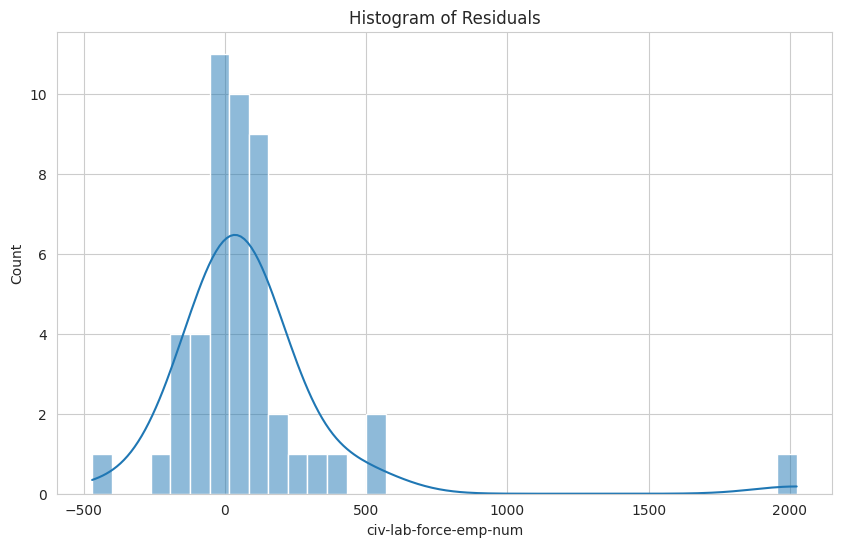

                         Feature        VIF
0                patents-awarded  52.722913
1    foreign-born-workers-se-occ  45.166438
2  all-workers-in-se-occupations  61.321311
3   rd-performed-dollar-millions  48.007003
4     state-gdop-dollar-millions  40.078061
                              OLS Regression Results                             
Dep. Variable:     civ-lab-force-emp-num   R-squared:                       0.645
Model:                               OLS   Adj. R-squared:                  0.644
Method:                    Least Squares   F-statistic:                     766.9
Date:                   Thu, 26 Oct 2023   Prob (F-statistic):               0.00
Time:                           14:25:27   Log-Likelihood:                -14011.
No. Observations:                   2114   AIC:                         2.803e+04
Df Residuals:                       2108   BIC:                         2.807e+04
Df Model:                              5                                        

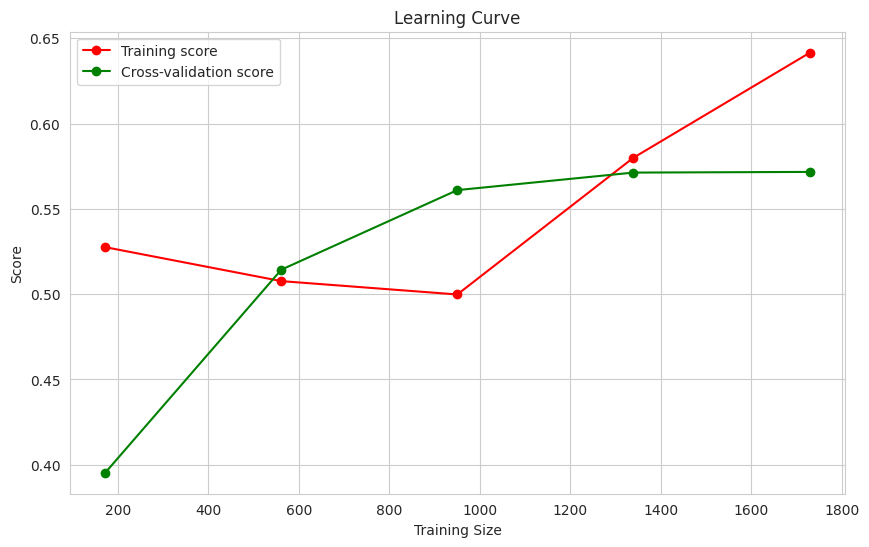

In [25]:
evaluate_model_by_race('Asian')